In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

## Read BGI input

In [6]:

rc = pd.read_csv('input/CM2.V412BS.report.tsv', sep='\t')
rc['smpl'] = 'V412BS'
rc.head()

,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Additional_Notes,smpl
0,mpf_maxbin.018_sub,26.05,0.80,Neural Network (Specific Model),11,None,V412BS
1,mpf_maxbin.025,94.67,0.48,Neural Network (Specific Model),11,None,V412BS
2,mpf_maxbin.027,45.75,2.10,Neural Network (Specific Model),11,None,V412BS
3,mpf_maxbin.028,99.99,6.51,Neural Network (Specific Model),11,None,V412BS
4,mpf_maxbin.029,98.92,1.80,Gradient Boost (General Model),11,None,V412BS


In [ ]:
#read all CM results
flist = [os.path.basename(x) for x in glob.glob('./input/CM2*')]

cm = pd.DataFrame(columns=['Name', 'Completeness', 'Contamination', 'Completeness_Model_Used',
       'Translation_Table_Used', 'Additional_Notes', 'smpl'])

for smpl in flist:
    tax = pd.read_csv(str(smpl), sep='\t')
    tax = tax.replace("\s\s+" , " ",regex=True)
    tao = tax[tax['type'] == 'P']
    pA = {'phy': tao['name']}
    df = pd.DataFrame(pA)
    pAll = pd.concat([pAll, df])
    
len(pAll['phy'].unique())

In [23]:
# Kood matching
svk = pd.read_csv('input/Skood_Vkood.csv', sep=';')
svk.head(2)

,skood,nameS
0,EGVD000009,V10WZV
1,EGVD000026,VM6N5L


In [22]:
# Main data
md = pd.read_csv('input/AllData_master.csv')
md = md[['skood','gender','Age_at_MBsample','BMI','WHR','samplingSeason','BP_systolic']]
md.head(2)

,skood,gender,Age_at_MBsample,BMI,WHR,samplingSeason,BP_systolic
0,EGVD049674,1,35.0,20.24,0.72,Spring,112.0
1,EGVD046120,1,36.0,18.89,0.75,Spring,118.0


In [24]:
#mrg = pd.merge(rc, svk, on='nameS')
mrg1 = pd.merge(mrg, md, on='skood')
mrg1.head(2)

,name,reads_numb,nameS,total_bp,maxCL_bp,avgCL_bp,N50,contigs,skood,gender,Age_at_MBsample,BMI,WHR,samplingSeason,BP_systolic
0,lab20_V32MIP_E100009727_L01,102273989,V32MIP,667657595,578836,1861,9188,358581,EGVD032347,1,61.0,23.58,0.83,Autumn,135.0
1,lab20_V40FOF_E100009887_L01,108961838,V40FOF,348325866,558300,1938,9345,179713,EGVD032524,1,50.0,21.62,0.78,Autumn,127.0


In [25]:
mrg1.to_csv('results/MainData_BGI1.csv', index=False)

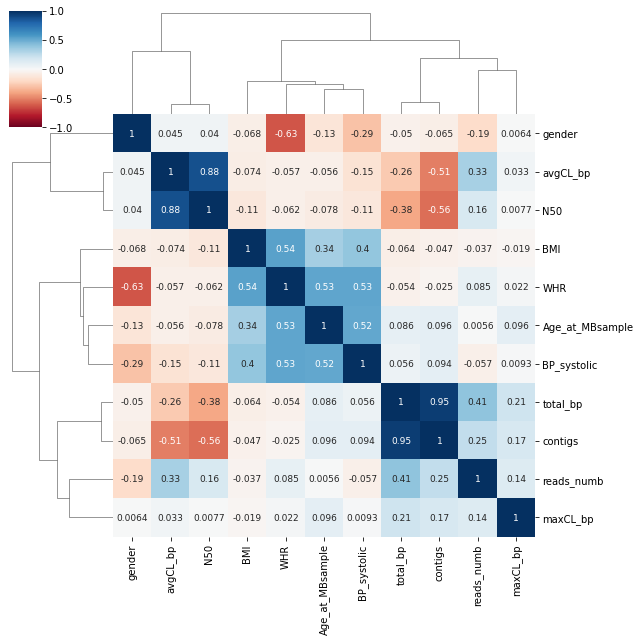

In [28]:
#Анализ взаимосвязи между признаками, матрица корреляций
cor = mrg1[['reads_numb','total_bp','maxCL_bp','avgCL_bp','N50','contigs','gender',
            'Age_at_MBsample','BMI','WHR','BP_systolic']].corr( )

sns.clustermap(cor, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 9}, vmin=-1, vmax=1, figsize=(9,9));

Text(0.5, 1.0, 'Data correlation\nBGI samples set, 10%\n')

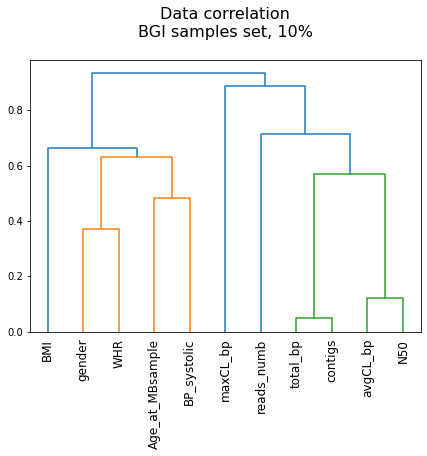

In [29]:
lb = (['reads_numb','total_bp','maxCL_bp','avgCL_bp','N50','contigs','gender',
            'Age_at_MBsample','BMI','WHR','BP_systolic'])
# group features hierarchically according to their distances. 
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(7,5))
dissimilarity = 1 - abs(cor)
Z = linkage(squareform(dissimilarity), 'average')

dendrogram(Z, labels=lb, orientation='top', leaf_rotation=90)
plt.title('Data correlation'+'\n'+'BGI samples set, 10%'+'\n', fontsize=16)